In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('input/bank.csv',sep=';')
term_deposits = df.copy()
data1=df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
label_columns = ['Age', 'Job', 'Marital', 'Education', 'HasCredit', 'HouseLoan', 'PersonalLoan', 'ContactType', 'LastContMonth', 'LastContDay', 'LastContDuration', 'Campaign', 'PreviousDay', 'PrevContNum', 'PrevOut', 'EmpVarRate', 'ConsumerPriceIdx', 'ConsConfIdx', 'Euribor', 'Employeeno', 'TermDeposit']
df.columns = label_columns

In [9]:
def var_dependency(df,f1,f2):
    var1=list(df[f1].unique())
    var2=list(df[f2].unique())
    dataframes = []
    for e in var2:
        dfv2 = df[df[f2]==e]
        dfv1 = dfv2.groupby(f1).count()[f2]
        dataframes.append(dfv1)
    xx=pd.concat(dataframes, axis=1)
    xx.columns=var2
    xx=xx.fillna(0)
    return xx

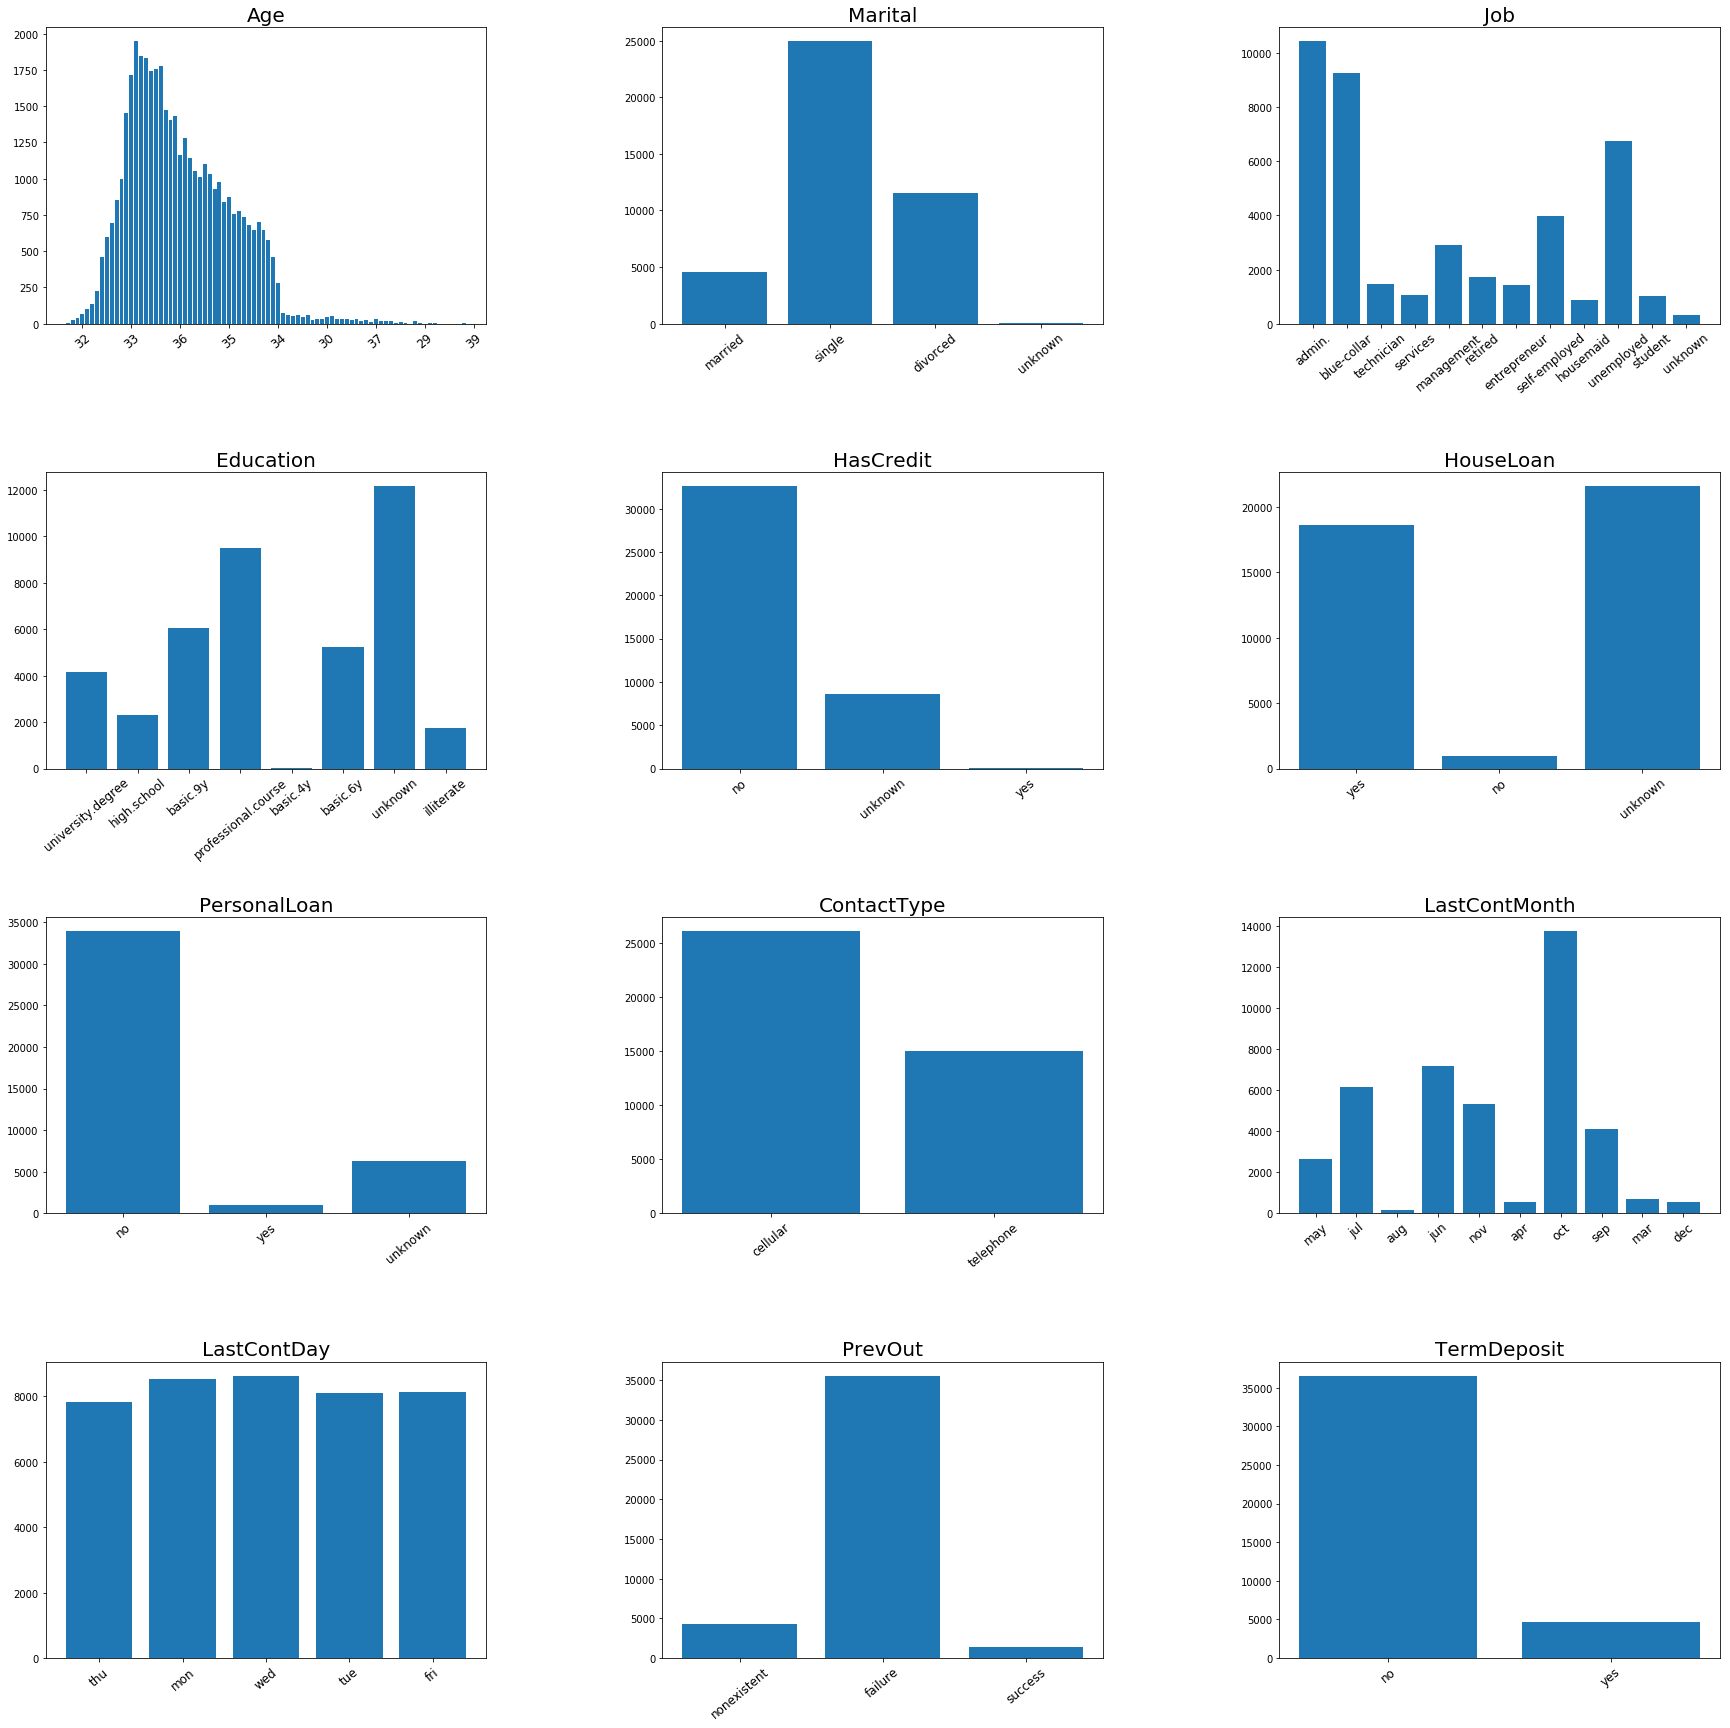

In [10]:
categorical_variables = ['Age', 'Marital', 'Job', 'Education', 'HasCredit', 'HouseLoan', 'PersonalLoan', 'ContactType', 'LastContMonth', 'LastContDay', 'PrevOut', 'TermDeposit']
nrows=4
ncols=int(len(categorical_variables)/nrows)
fig,ax2d=plt.subplots(nrows,ncols, figsize=(30,30))

fig.subplots_adjust(wspace=0.4, hspace=0.5)
ax=np.ravel(ax2d)

for count,col in enumerate(categorical_variables):
    ax[count].bar(df[col].value_counts().index,df[col].value_counts().values)
    ax[count].legend(loc=1)
    ax[count].set_title(col, fontsize= 20)
    ax[count].set_xticklabels(df[col].value_counts().index, rotation=40, fontsize= 12)
plt.show()


In [11]:
categorical_variables = ['Marital', 'Job', 'Education', 'HasCredit', 'HouseLoan', 'PersonalLoan', 'ContactType', 'LastContMonth', 'LastContDay', 'PrevOut', 'TermDeposit']
for col in categorical_variables:
    df.ix[df[col]=='unknown',col] = np.nan

In [12]:
var_dependency(df,'Job','Education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,nan,university.degree,illiterate
admin.,77,3329,151,499,363,0.0,5753,1.0
blue-collar,2318,878,1426,3623,453,0.0,94,8.0
entrepreneur,137,234,71,210,135,0.0,610,2.0
housemaid,474,174,77,94,59,0.0,139,1.0
management,100,298,85,166,89,0.0,2063,0.0
retired,597,276,75,145,241,0.0,285,3.0
self-employed,93,118,25,220,168,0.0,765,3.0
services,132,2682,226,388,218,0.0,173,0.0
student,26,357,13,99,43,0.0,170,0.0
technician,58,873,87,384,3320,0.0,1809,0.0


In [13]:
df.loc[(df.Age>60) & (df.Job.isnull()) ,'Job'] = 'retired'
df.loc[(df.Education.isnull()) & (df.Job=='management'), 'Education'] = 'university.degree'
df.loc[(df.Education.isnull()) & (df.Job=='services'), 'Education'] = 'high.school'
df.loc[(df.Education.isnull()) & (df.Job=='housemaid'), 'Education'] = 'basic.4y'
df.loc[(df.Job.isnull()) & (df.Education=='basic.4y'), 'Job'] = 'blue-collar'
df.loc[(df.Job.isnull()) & (df.Education=='basic.6y'), 'Job'] = 'blue-collar'
df.loc[(df.Job.isnull()) & (df.Education=='basic.9y'), 'Job'] = 'blue-collar'
df.loc[(df.Job.isnull()) & (df.Education=='professional.course'), 'Job'] = 'technician'

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
Age                 41188 non-null int64
Job                 40990 non-null object
Marital             41108 non-null object
Education           39772 non-null object
HasCredit           32591 non-null object
HouseLoan           40198 non-null object
PersonalLoan        40198 non-null object
ContactType         41188 non-null object
LastContMonth       41188 non-null object
LastContDay         41188 non-null object
LastContDuration    41188 non-null int64
Campaign            41188 non-null int64
PreviousDay         41188 non-null int64
PrevContNum         41188 non-null int64
PrevOut             41188 non-null object
EmpVarRate          41188 non-null float64
ConsumerPriceIdx    41188 non-null float64
ConsConfIdx         41188 non-null float64
Euribor             41188 non-null float64
Employeeno          41188 non-null float64
TermDeposit         41188 non-null object
dtypes: f

In [15]:
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_betw_5_15'] = 0
df['pdays_greater_15'] = 0
df['pdays_missing'][df['PreviousDay']==999] = 1
df['pdays_less_5'][df['PreviousDay']<5] = 1
df['pdays_betw_5_15'][(df['PreviousDay']>=5) & (df['PreviousDay']<=15)] = 1
df['pdays_greater_15'][(df['PreviousDay']>15) & (df['PreviousDay'] < 999)] = 1
df_dropped_pdays = df.drop('PreviousDay', axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 25 columns):
Age                 41188 non-null int64
Job                 40990 non-null object
Marital             41108 non-null object
Education           39772 non-null object
HasCredit           32591 non-null object
HouseLoan           40198 non-null object
PersonalLoan        40198 non-null object
ContactType         41188 non-null object
LastContMonth       41188 non-null object
LastContDay         41188 non-null object
LastContDuration    41188 non-null int64
Campaign            41188 non-null int64
PreviousDay         41188 non-null int64
PrevContNum         41188 non-null int64
PrevOut             41188 non-null object
EmpVarRate          41188 non-null float64
ConsumerPriceIdx    41188 non-null float64
ConsConfIdx         41188 non-null float64
Euribor             41188 non-null float64
Employeeno          41188 non-null float64
TermDeposit         41188 non-null object
pdays_mis

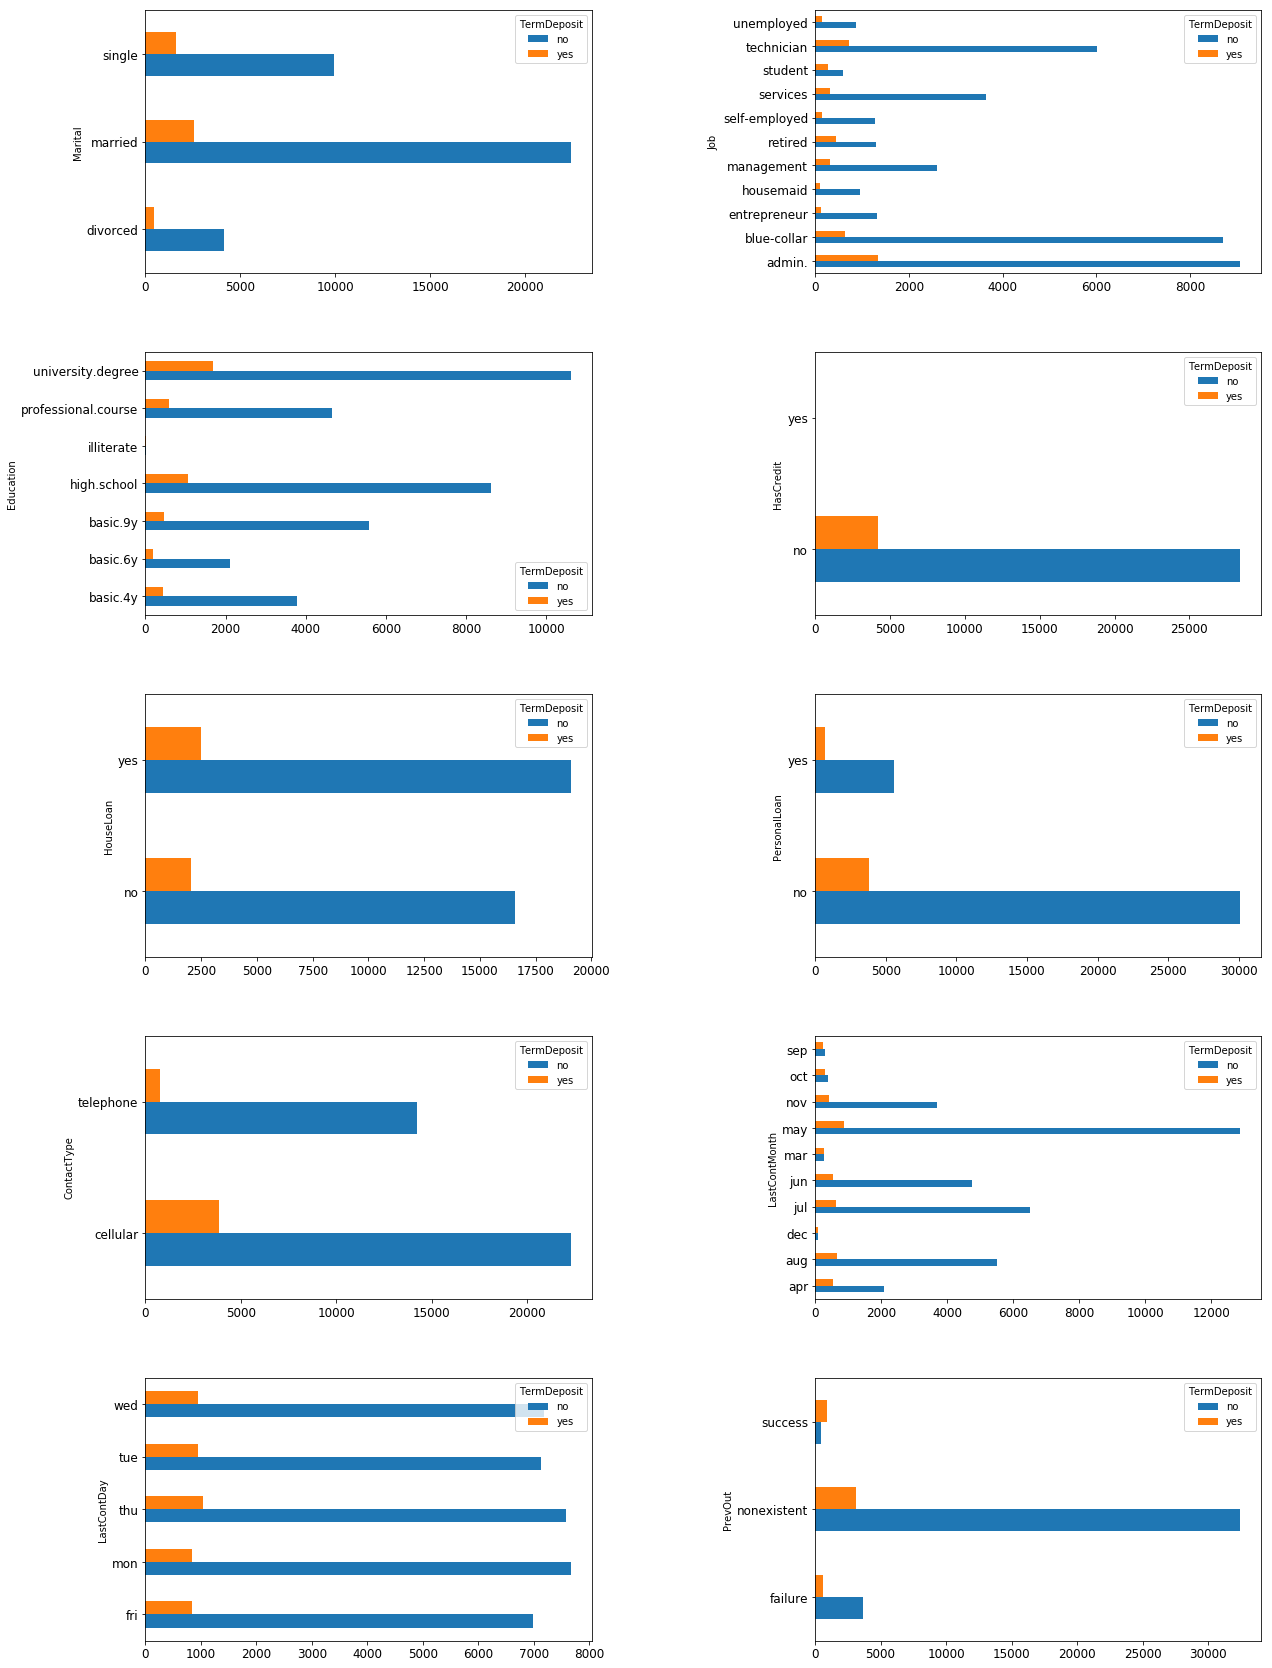

In [20]:
categorical_variables = ['Marital', 'Job', 'Education', 'HasCredit', 'HouseLoan', 'PersonalLoan', 'ContactType', 'LastContMonth', 'LastContDay', 'PrevOut']
nrows=5
ncols=int(len(categorical_variables)/nrows)
fig,ax2d=plt.subplots(nrows,ncols, figsize=(20,30))

fig.subplots_adjust(wspace=0.5, hspace=0.3)
ax=np.ravel(ax2d)

for count,col in enumerate(categorical_variables):
    df3 = pd.crosstab(df[col], df['TermDeposit'])
    df3.plot(ax=ax[count], kind='barh', fontsize=12)
    
plt.show()

In [21]:
pd.crosstab(df['Age'],df['TermDeposit'])

TermDeposit,no,yes
Age,,
17,3,2
18,16,12
19,22,20
20,42,23
21,73,29
22,101,36
23,178,48
24,377,86
25,505,93


In [22]:
df_with_dummies=pd.get_dummies(df_dropped_pdays)

In [23]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
Age                              41188 non-null int64
LastContDuration                 41188 non-null int64
Campaign                         41188 non-null int64
PrevContNum                      41188 non-null int64
EmpVarRate                       41188 non-null float64
ConsumerPriceIdx                 41188 non-null float64
ConsConfIdx                      41188 non-null float64
Euribor                          41188 non-null float64
Employeeno                       41188 non-null float64
pdays_missing                    41188 non-null int64
pdays_less_5                     41188 non-null int64
pdays_betw_5_15                  41188 non-null int64
pdays_greater_15                 41188 non-null int64
Job_admin.                       41188 non-null uint8
Job_blue-collar                  41188 non-null uint8
Job_entrepreneur                 41188 non-null uint8
Job_housemaid    

In [24]:
def dropfeatures(df,f):
    '''Drop one of the dummy variables'''
    df=df.drop(f, axis=1)
    return df

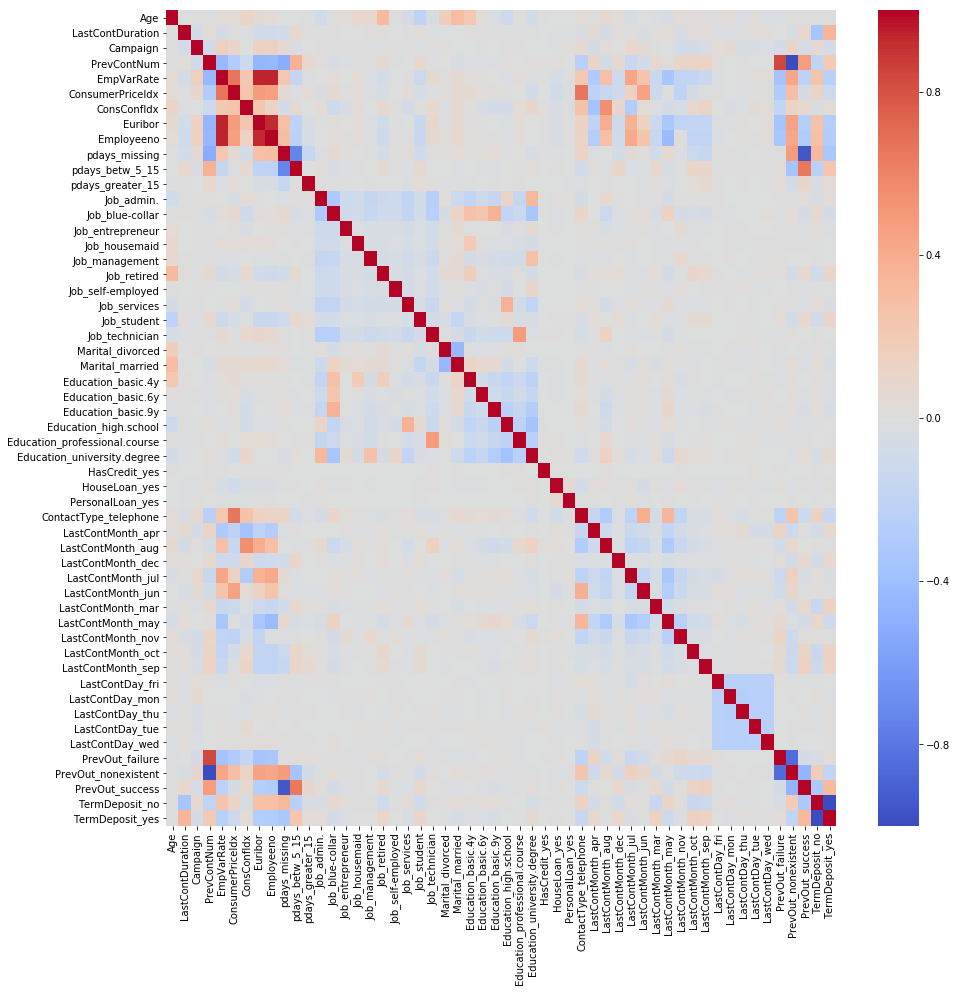

In [25]:
features_dropped = ['HasCredit_no','PersonalLoan_no','HouseLoan_no','Marital_single','ContactType_cellular','Education_illiterate',
                    'Job_unemployed', 'pdays_less_5']
df_clean = dropfeatures(df_with_dummies, features_dropped)

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_clean.corr(method='spearman'), annot=False, cmap='coolwarm')
plt.show()

In [26]:
df3=df
df3['TermDeposit'] = df['TermDeposit'].map({'yes': 1, 'no':0})
Term_Call = df3[df3.TermDeposit==1].TermDeposit
Prev_Call = df3[df3.PrevOut=='success'].TermDeposit
stats.ttest_ind(Term_Call, Prev_Call)

Ttest_indResult(statistic=49.852363111551121, pvalue=0.0)